### Importing Libraries

In [317]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [318]:
df = pd.read_csv("cubic_zirconia.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


### Check the data description

Variable Name	Description

Carat	 Carat weight of the cubic zirconia.

Cut	 Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

Color 	 Colour of the cubic zirconia.With D being the best and J the worst.

Clarity	 cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = 
flawless, l1= level 1 inclusion) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1

Depth	 The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

Table	 The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

Price	 the Price of the cubic zirconia.

X	 Length of the cubic zirconia in mm.

Y	 Width of the cubic zirconia in mm.

Z	 Height of the cubic zirconia in mm.

### Check the shape of the dataset

In [319]:
df.shape

(26967, 11)

### Get the info data types column wise

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


### Get the summary statistics of the dataset

In [321]:
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


### Get the Correlation Heatmap

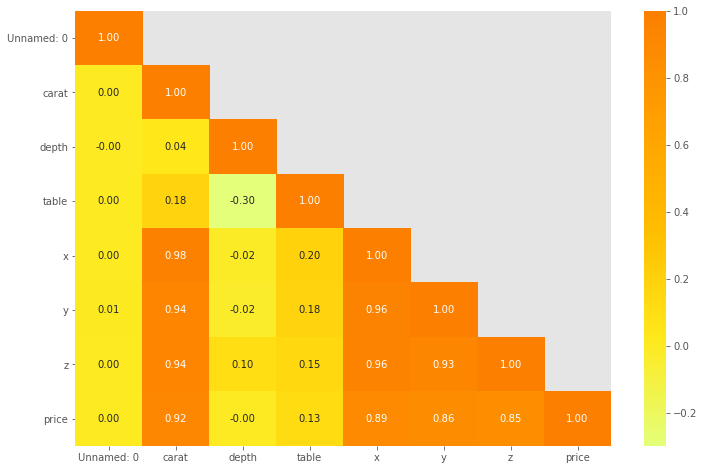

In [322]:
plt.figure(figsize=(12,8))
sns.heatmap(df.iloc[:,0:13].corr(),annot=True,fmt='.2f',cmap='Wistia',mask=np.triu(df.iloc[:,0:13].corr(),+1))
plt.show()

### Drop unwanted column

In [323]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [324]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [325]:
df_dtype=df.dtypes
df_missing=df.isna().mean().round(4)*100
df_desc = df.describe(include='all')
dtls_1=pd.DataFrame(df_missing, columns=['missing'])
dtls_2=pd.DataFrame(df_dtype, columns=['dtype'])
dtls_3=pd.DataFrame(df_desc)
dtls_3=dtls_3.T
dtls=pd.concat([dtls_1, dtls_2, dtls_3], axis=1)
dtls.sort_values(by='missing', ascending=False)

,missing,dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max
depth,2.58,float64,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
carat,0.00,float64,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,0.00,object,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,0.00,object,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,0.00,object,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
table,0.00,float64,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,0.00,float64,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,0.00,float64,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,0.00,float64,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8
price,0.00,int64,26967,NaN,NaN,NaN,3939.52,4024.86,326,945,2375,5360,18818


### Missing value Treatment

In [326]:
df['depth'].fillna(df['depth'].mean(), inplace=True)

### Let's drop duplicates

In [327]:
print(f'Shape before removing duplicates{df.shape}')
df.drop_duplicates(inplace=True)
print(f'Shape after removing duplicates{df.shape}')

Shape before removing duplicates(26967, 10)
Shape after removing duplicates(26933, 10)


### Univariate Analysis

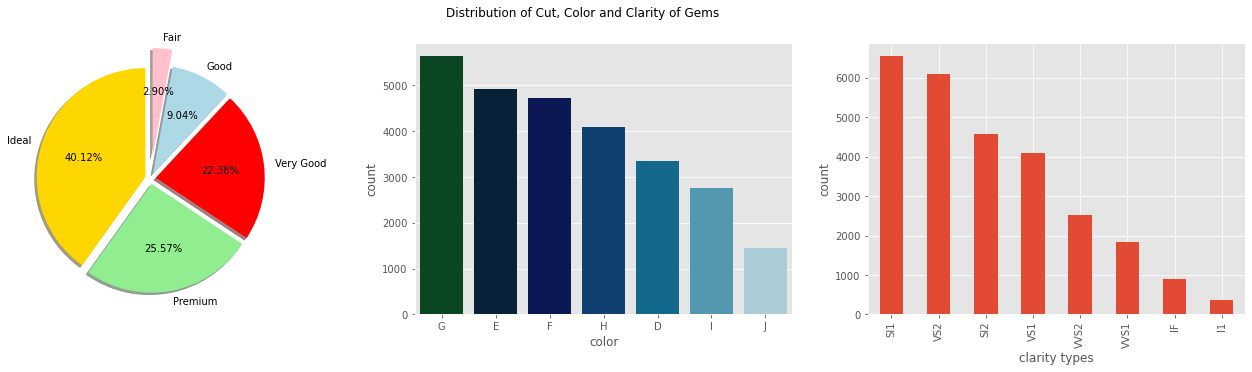

In [328]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['cut'].value_counts().values,
        labels=df['cut'].value_counts().index,
        startangle=90,
        colors=['gold', 'lightgreen', 'red', 'lightblue', 'pink'],
        explode=[0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%')
plt.subplot(132)
sns.countplot(df['color'], palette='ocean', order=df['color'].value_counts().index)

plt.subplot(133)
df["clarity"].value_counts().plot.bar()
plt.xlabel('clarity types')
plt.ylabel('count')


plt.suptitle('Distribution of Cut, Color and Clarity of Gems')
plt.show()

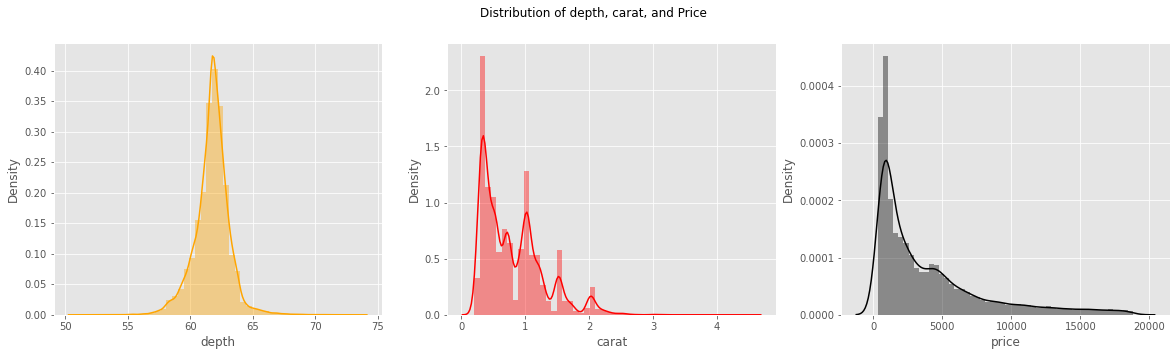

In [329]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.distplot(df['depth'], color='orange')

plt.subplot(132)
sns.distplot(df['carat'], color='red')

plt.subplot(133)
sns.distplot(df['price'], color='black')

plt.suptitle('Distribution of depth, carat, and Price')
plt.show()

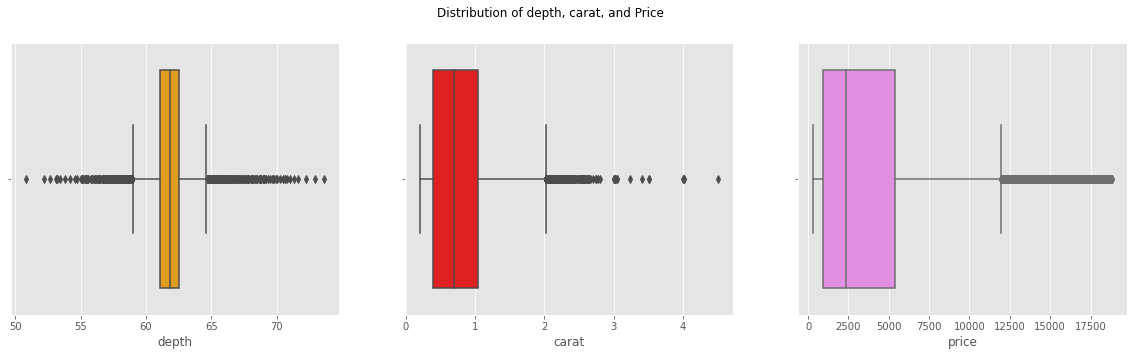

In [330]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.boxplot(df['depth'], color='orange')

plt.subplot(132)
sns.boxplot(df['carat'], color='red')

plt.subplot(133)
sns.boxplot(df['price'], color='violet')

plt.suptitle('Distribution of depth, carat, and Price')
plt.show()

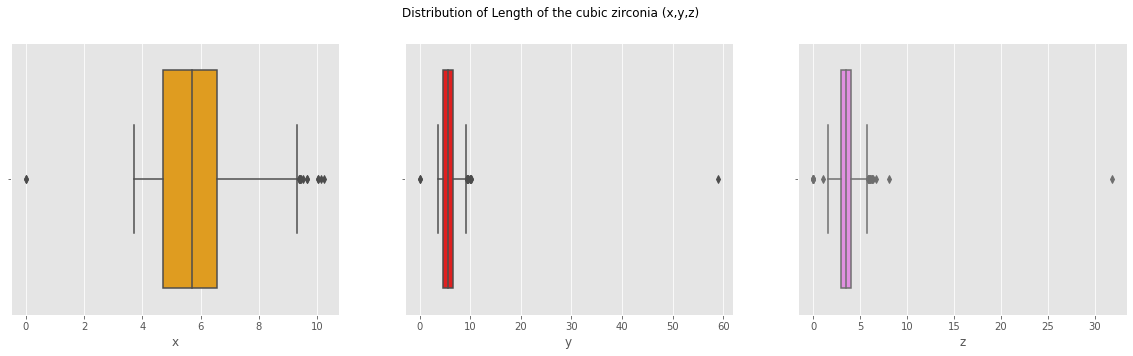

In [331]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.boxplot(df['x'], color='orange')

plt.subplot(132)
sns.boxplot(df['y'], color='red')

plt.subplot(133)
sns.boxplot(df['z'], color='violet')

plt.suptitle('Distribution of Length of the cubic zirconia (x,y,z)')
plt.show()

In [332]:
import plotly.express as px

### Bivariate Analysis

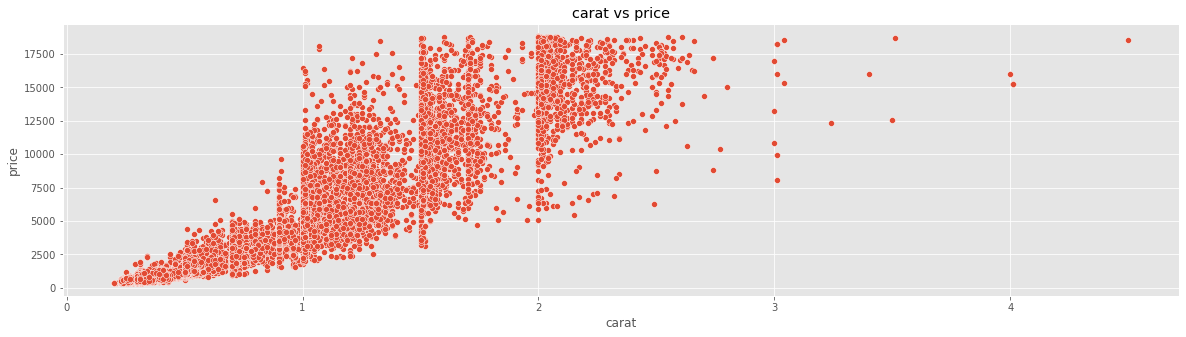

In [333]:
sns.scatterplot(df['carat'], df['price'])
plt.title('carat vs price')
plt.show()

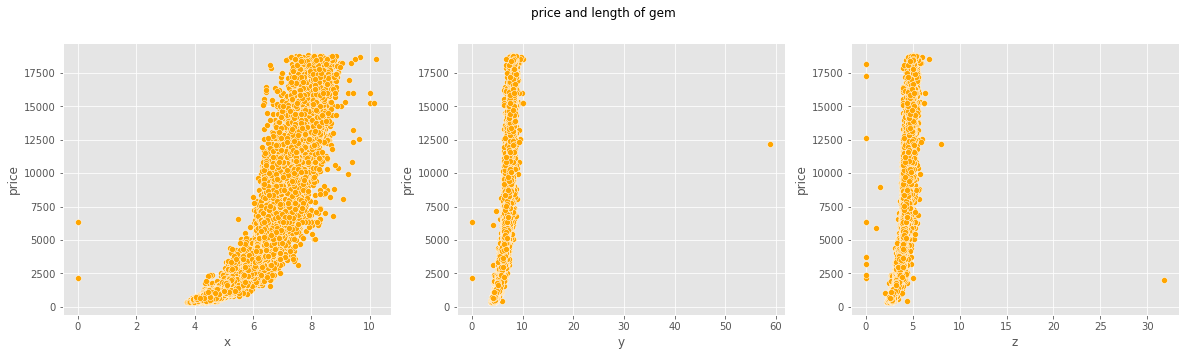

In [334]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.scatterplot(df['x'], df['price'], color='orange')

plt.subplot(132)
sns.scatterplot(df['y'], df['price'], color='orange')

plt.subplot(133)
sns.scatterplot(df['z'], df['price'], color='orange')

plt.suptitle('price and length of gem')
plt.show()

In [335]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### Checking for zero values

In [336]:
df[(df['x']==0)|(df['y']==0)|(df['z']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [337]:
print('Count of zero values in orginal dataset: ', df[(df['x']==0)|(df['y']==0)|(df['z']==0)].value_counts().sum())

Count of zero values in orginal dataset:  8


In [338]:
# We have eight records with zero values
#The zeros are in gem size and length, which we can either drop or replace with a proper value.
#We choose to drop because dropping 8 from 27,000 will not affect the dataset much
df=df[~((df['x']==0)|(df['y']==0)|(df['z']==0))]

In [339]:
print('Zero values after dropping: ', df[(df['x']==0)|(df['y']==0)|(df['z']==0)].value_counts().sum())

Zero values after dropping:  0


In [340]:
df[['price', 'cut']].groupby(['cut']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='Wistia')

In [341]:
df[['price', 'color']].groupby(['color']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='Wistia')

In [342]:
df[['price', 'clarity']].groupby(['clarity']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='Wistia')

In [343]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]

### Removing outliers

In [344]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [345]:
for column in df[cols].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

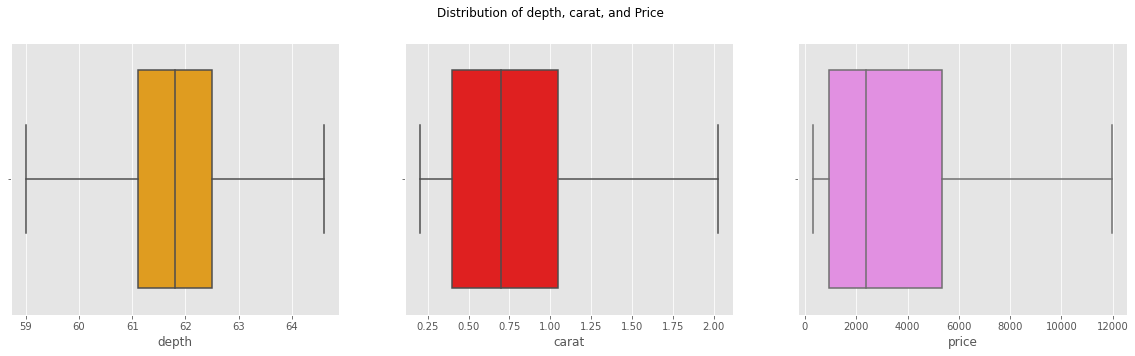

In [346]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.boxplot(df['depth'], color='orange')

plt.subplot(132)
sns.boxplot(df['carat'], color='red')

plt.subplot(133)
sns.boxplot(df['price'], color='violet')

plt.suptitle('Distribution of depth, carat, and Price')
plt.show()

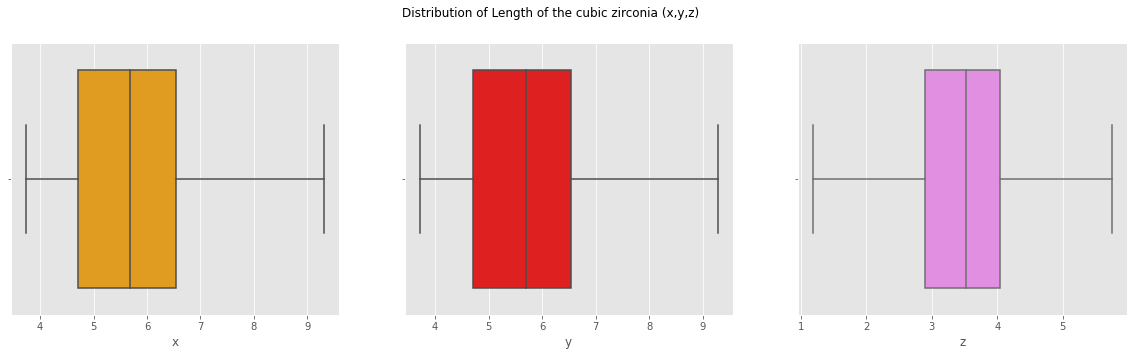

In [347]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.boxplot(df['x'], color='orange')

plt.subplot(132)
sns.boxplot(df['y'], color='red')

plt.subplot(133)
sns.boxplot(df['z'], color='violet')

plt.suptitle('Distribution of Length of the cubic zirconia (x,y,z)')
plt.show()

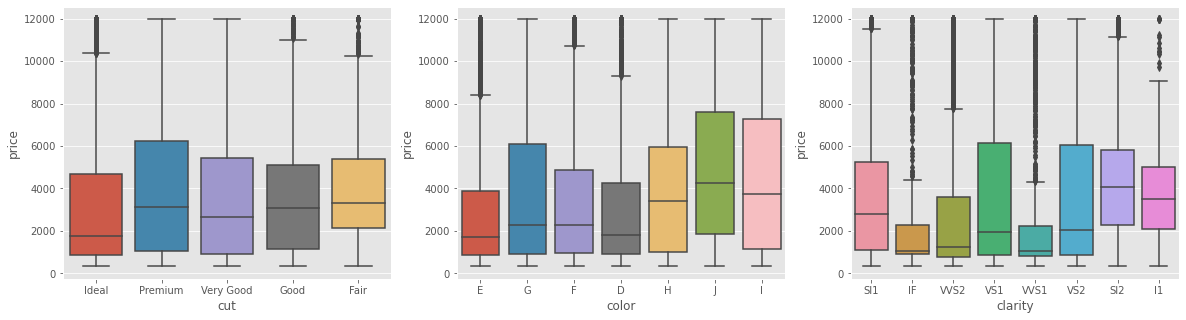

In [348]:
plt.subplot(131)
sns.boxplot(df['cut'], df['price']);

plt.subplot(132)
sns.boxplot(df['color'], df['price']);

plt.subplot(133)
sns.boxplot(df['clarity'], df['price']);

In [349]:
print('cut\n',df.cut.value_counts())
print('\n')
print('color\n',df.color.value_counts())
print('\n')
print('clarity\n',df.clarity.value_counts())
print('\n')

cut
 Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64


color
 G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: color, dtype: int64


clarity
 SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64




In [350]:
df['cut']=np.where(df['cut'] =='Ideal', '4', df['cut'])
df['cut']=np.where(df['cut'] =='Premium', '3', df['cut'])
df['cut']=np.where(df['cut'] =='Very Good', '2', df['cut'])
df['cut']=np.where(df['cut'] =='Good', '1', df['cut'])
df['cut']=np.where(df['cut'] =='Fair', '0', df['cut'])

In [351]:
df['color']=np.where(df['color'] =='D', '6', df['color'])
df['color']=np.where(df['color'] =='E', '5', df['color'])
df['color']=np.where(df['color'] =='F', '4', df['color'])
df['color']=np.where(df['color'] =='G', '3', df['color'])
df['color']=np.where(df['color'] =='H', '2', df['color'])
df['color']=np.where(df['color'] =='I', '1', df['color'])
df['color']=np.where(df['color'] =='J', '0', df['color'])

In [352]:
df['clarity']=np.where(df['clarity'] =='IF', '7', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS1', '6', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS2', '5', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS1', '4', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS2', '3', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI1', '2', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI2', '1', df['clarity'])
df['clarity']=np.where(df['clarity'] =='I1', '0', df['clarity'])

In [353]:
df.dtypes # The'cut','color','clarity' column still showing as 'Object'.

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [354]:
# converting the'cut','color','clarity' column from object / string type to float.
df['cut'] = df['cut'].astype('float64')
df['color'] = df['color'].astype('float64')
df['clarity'] = df['clarity'].astype('float64')

In [355]:
df.dtypes

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

### Split the dataset

In [356]:
X = df.iloc[:,0:9]
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65


In [357]:
Y = df['price']
Y.head()

0     499.0
1     984.0
2    6289.0
3    1082.0
4     779.0
Name: price, dtype: float64

In [358]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

### Using Statsmodels OLS

In [359]:
# This adds the constant term beta0 to the Simple Linear Regression.
X_con=sm.add_constant(X)

In [360]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(X_con, Y, test_size=0.30 , random_state=1)

### Make the linear model using OLS

In [361]:
model = sm.OLS(y_trainc,X_trainc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.834e+04
Date:                Fri, 30 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:57:41   Log-Likelihood:            -1.5509e+05
No. Observations:               18847   AIC:                         3.102e+05
Df Residuals:                   18837   BIC:                         3.103e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5009.9557    800.143     -6.261      0.000   -6578.308   -3441.603
carat       8887.3201     82.561    107.645      0.000    8725.492    9049.148
cut          113.3066      7.313     15.494      0.000      98.973     127.640
color        273.2211      4.105     66.557      0.000     265.175     281.267
clarity      436.8934      4.471     97.723      0.000     428.130     445.656
depth         35.2862     11.092      3.181      0.001      13.544      57.028
table        -15.0821      3.913     -3.854      0.000     -22.753      -7.412
x          -1349.1299    135.380     -9.966      0.000   -1614.486   -1083.773
y           1561.2021    133.054     11.734      0.000    1300.405    1822.000
z           -968.8951    139.077     -6.967      0.000   -1241.498    -696.292
==============================================================================
Omnibus:                     2652.211   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9565.281
Skew:                           0.690   Prob(JB):                         0.00
Kurtosis:                       6.206   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Get the value of coefficient of determination

In [362]:
print('The variation in the independent variable which is explained by the dependent variable is',round(model.rsquared*100,4),'%')

The variation in the independent variable which is explained by the dependent variable is 93.1228 %


In [363]:
### Get the Predictions on test set

In [364]:
ypred = model.predict(X_testc)
print(ypred)

11971     8287.181507
3294      4857.694573
25427    13477.121782
709      11643.308605
8010      8618.030841
             ...     
17455     4200.055754
26170     4321.258129
22115      -28.151598
2275       408.746213
25166     5238.470164
Length: 8078, dtype: float64


In [365]:
### Get the RMSE on training set

In [366]:
print("The Root Mean Square Error (RMSE) of the model is for the training set is",mean_squared_error(model.fittedvalues,y_trainc,squared=False))

The Root Mean Square Error (RMSE) of the model is for the training set is 906.9014816576433


In [367]:
## Calculating the RMSE values with the code shown in the videos

math.sqrt(np.mean((model.predict(X_trainc)-y_trainc)**2))

906.9014816576442

In [368]:
model.predict(X_trainc)

5030     5513.397586
12108    5210.026763
20181    1803.708500
4712     2478.952742
2548     5637.696363
            ...     
10965    1109.805069
17309    8645.445592
5193     6730.063875
12182    1832.585319
235      8301.859450
Length: 18847, dtype: float64

In [369]:
### RMSE on test set
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test,ypred)))

The Root Mean Square Error (RMSE) of the model is for testing set is 911.2934208600333


In [370]:
###Using Linear Model from Sci-kit learn library
### Fit the model to the training set

In [372]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [373]:
### Get the score on training set

In [374]:
print('The coefficient of determination R^2 of the prediction on Train set',regression_model.score(X_train, y_train))

The coefficient of determination R^2 of the prediction on Train set 0.9312284391103018


In [375]:
### Get the score on test set

In [227]:
print('The coefficient of determination R^2 of the prediction on Test set',regression_model.score(X_test, y_test))

The coefficient of determination R^2 of the prediction on Test set 0.9078450468506659


In [376]:
### Get the RMSE on test set

In [229]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test,regression_model.predict(X_test))))

The Root Mean Square Error (RMSE) of the model is for testing set is 1230.2738369850542


In [377]:
### Check Multi-collinearity using VIF

In [378]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [379]:
i=0
for column in X.columns:
    if i < 15:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 122.8186498126823
cut ---> 10.30171333124636
color ---> 5.545684949980151
clarity ---> 5.4591712263998575
depth ---> 1219.3828150039049
table ---> 874.1792162625527
x ---> 10678.572903635757
y ---> 9425.437468412136
z ---> 3318.091734746529


In [380]:
sns.scatterplot(x=y_test['price'], y=ypred, color = 'purple')
sns.despine(left = False, bottom = False)
plt.title('Test Label Vs Predicted Label');

KeyError: 'price'

In [236]:
df = pd.read_csv("cubic_zirconia.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [238]:
print(f'before removing duplicates{df.shape}')
df.drop_duplicates(inplace=True)
print(f'after removing duplicates{df.shape}')

before removing duplicates(26967, 11)
after removing duplicates(26967, 11)


In [240]:
df=df.iloc[:, 1:]

In [242]:
df.head()

,cut,color,clarity,depth,table,x,y,z,price
0,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [243]:
df['cut']=df['cut'].replace(('Fair', 'Good', 'Very Good', 'Premium', 'Ideal'), (1,2,3,4,5))

In [245]:
colors_dummies=pd.get_dummies(df['color'], drop_first=True)
clarity_dummies=pd.get_dummies(df['clarity'], drop_first=True)

In [246]:
dummies=pd.concat([colors_dummies, clarity_dummies], axis=1)

In [247]:
df=pd.concat([df, dummies], axis=1)

In [248]:
df.drop(['color', 'clarity'], axis=1, inplace=True)

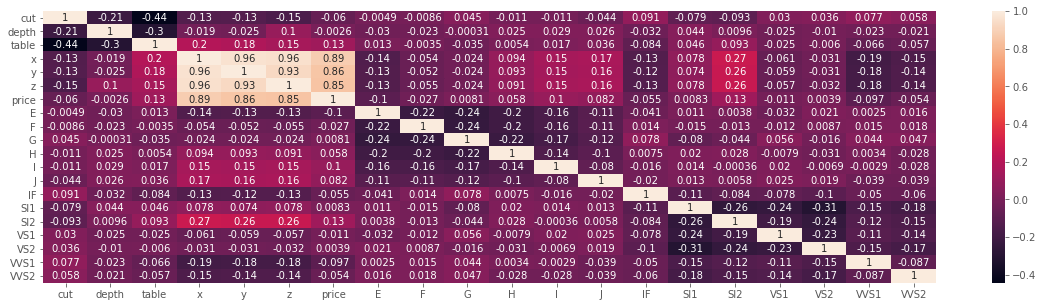

In [249]:
sns.heatmap(df.corr(), annot=True);